### Diabetes Prediction

Capstone Project 


##### DESCRIPTION
NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The dataset used in this project is originally from NIDDK. The objective is to build a model to accurately predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.


#### Dataset Description
The datasets consists of several medical predictor variables and one target variable (Outcome).
 
        Pregnancies               Number of times pregnant.
        Glucose Plasma            glucose concentration in an oral glucose tolerance test.
        BloodPressure 	        Diastolic blood pressure (mm Hg).
        SkinThickness             Triceps skinfold thickness (mm).
        Insulin                   Two hour serum insulin.
        BMI                       Body Mass Index.
        DiabetesPedigreeFunction  Diabetes pedigree function.
        Age                       Age in years.
        Outcome                   Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0


### Project Tasks:

1.	Perform descriptive analysis. 

2.	Visually explore the variables, you may need to look for the distribution of the variables using histograms. Treat the missing values accordingly.

3.	 We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

4.	Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

5.	Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

6.	Perform correlation analysis. Visually explore it using a heat map.

7.	Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?

8.	Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.

9.	Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?

10.	Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

    a) Pie chart to describe the diabetic/non-diabetic population.
    
    b) Scatter charts between relevant variables to analyse the relationship.
    
    c) Histogram/frequency charts to analyse the distribution of the data.
    
    d) Heatmap of correlation analysis among the relevant variables.
    
    e) Create bins of Age values – 20-25, 25-30, 30-35 etc. and analyse different variables for these age brackets using a bubble chart.
    
   

In [118]:
#Importing necessary libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,plot_roc_curve,f1_score,precision_score,recall_score
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [119]:
data = pd.read_csv('health care diabetes.csv')

#### Q1. Perform descriptive analysis. 

In [120]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [121]:
data.shape

(768, 9)

In [122]:
data.sample(10) #Checking random samples for descripancies

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
83,0,101,65,28,0,24.6,0.237,22,0
76,7,62,78,0,0,32.6,0.391,41,0
194,8,85,55,20,0,24.4,0.136,42,0
585,1,93,56,11,0,22.5,0.417,22,0
49,7,105,0,0,0,0.0,0.305,24,0
669,9,154,78,30,100,30.9,0.164,45,0
518,13,76,60,0,0,32.8,0.180,41,0
649,0,107,60,25,0,26.4,0.133,23,0
185,7,194,68,28,0,35.9,0.745,41,1
682,0,95,64,39,105,44.6,0.366,22,0


##### Observations:
We notice some columns in the dataset contain values as '0' .

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [124]:
data.isnull().sum()  #Checking Missing Values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [125]:
data.duplicated().sum()  #Checking for duplicates

0

In [126]:
#Checking statistical summary
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Observations:
From the above statistics, we can see that the minimum value for columns Glucose, BloodPressure, SkinThickness, Insulin and BMI is 0 which can't be practically possible for these variables. These implies missing values, hence need to update it to NaN.


#### Q2.	Visually explore the variables, you may need to look for the distribution of the variables using histograms. Treat the missing values accordingly.

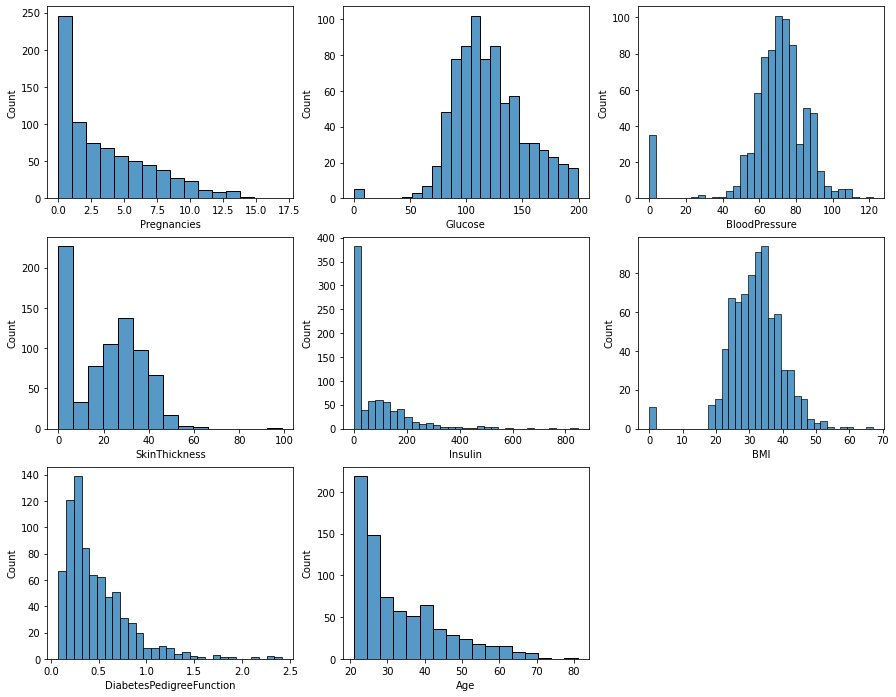

In [127]:
#Checking distribution of variables
plt.figure(figsize=(15,12))
for i in range(8):
    plt.subplot(3,3,i+1)
    sns.histplot(data.iloc[:,i]) 

##### Observations:
From the above density plot, we can see that the data is mostly skewed. Hence we shall replace the missing values with respective 'Median' values. The spikes seen at zero are missing values

In [128]:
data_copy = data.copy(deep=True)  #Taking Backup of our dataframe

In [129]:
#Updating 0 values to nan
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

data[data[cols] ==  0] = np.nan

In [130]:
data.isnull().sum() #Re-checking Missing Values

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [131]:
# Treating null values using Simple Imputer with Median Strategy

impute = SimpleImputer(strategy='median')

df = pd.DataFrame(impute.fit_transform(data), columns = data.columns)

In [132]:
df.isnull().sum() #No missing values now

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Q3. We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables

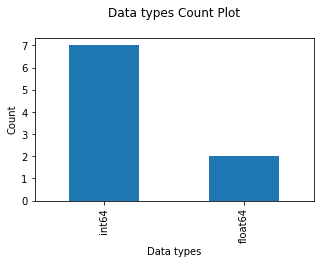

In [133]:
data_copy.dtypes.value_counts().plot(kind='bar', figsize=(5,3),title = 'Data types Count Plot\n', xlabel='Data types', ylabel= 'Count' )
plt.show()


##### Observations:
From the above count plot we can say that our Dataset contains 7 variables which are Integer while 2 variables are of Float datatypes.

#### Q4. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

In [134]:
df.Outcome.value_counts(normalize=True)*100

0.0    65.104167
1.0    34.895833
Name: Outcome, dtype: float64

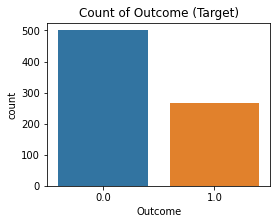

In [135]:
plt.figure(figsize=(4,3))
sns.countplot(x ='Outcome', data = df)
plt.title("Count of Outcome (Target)")
plt.show()

##### Observations: 
Approximately 35% of patients in the dataset have Diabetes white 65% are Non Diabetic.

#### Q5.	Create scatter charts between the pair of variables to understand the relationships. Describe your findings.
#### Q6.	Perform correlation analysis. Visually explore it using a heat map.

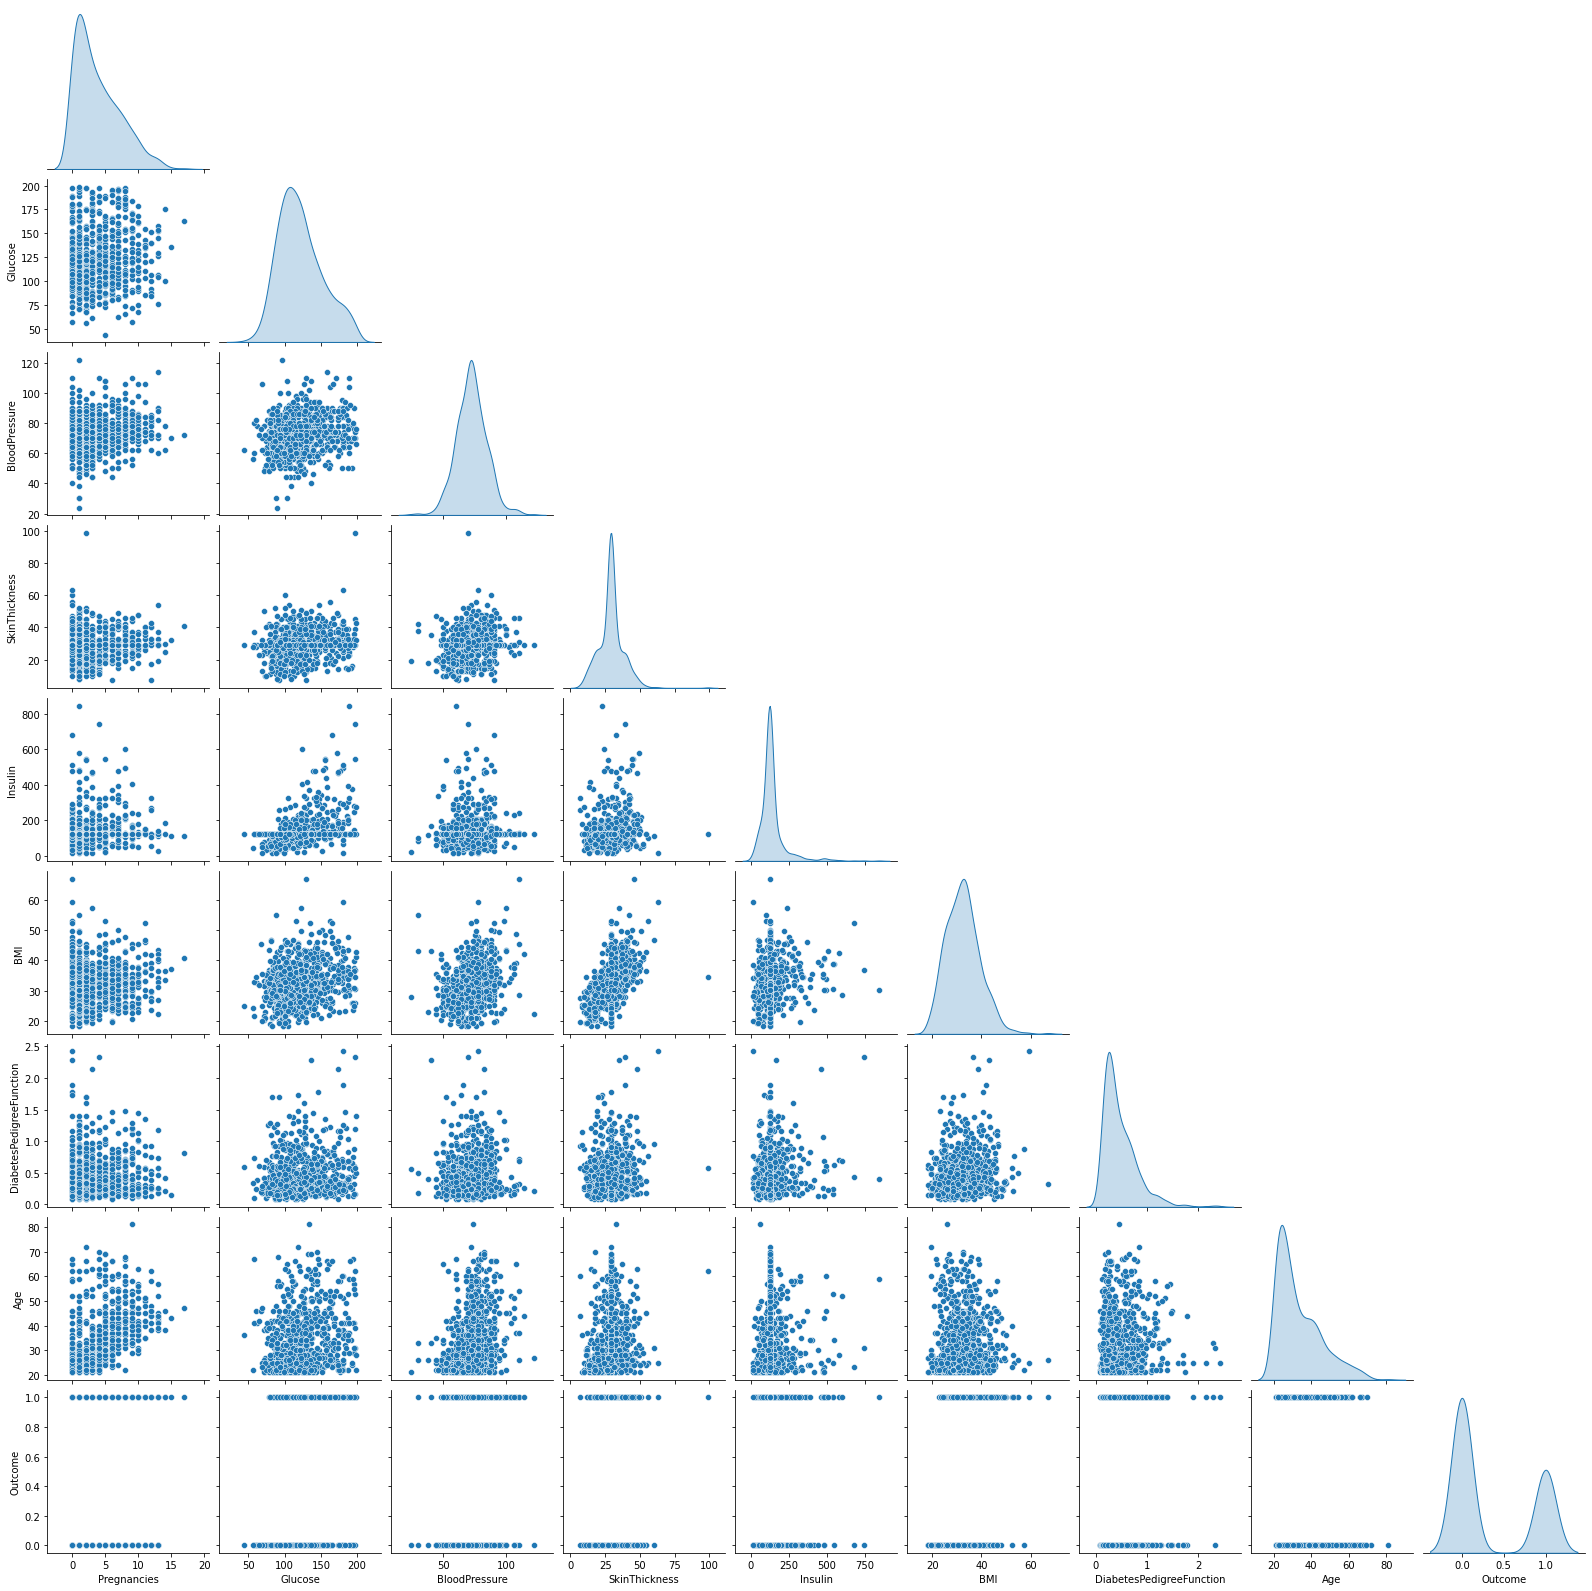

In [136]:
#scatter charts between the pair of variables 

sns.pairplot(data = df, kind = 'scatter',diag_kind= 'kde',corner = True)
plt.show()

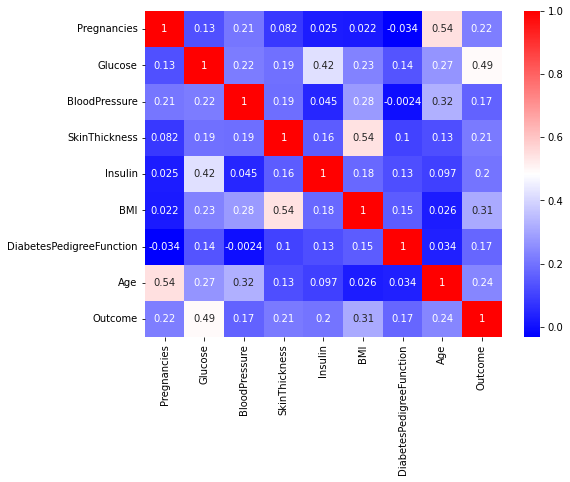

In [137]:
#Correlation analysis using Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='bwr',annot = True)
plt.show()

##### Observations:

From both the above Pairplot and Heatmap we can understand the following:
1. "BMI" and "SkinThickness" are positively correlated. More BMI means more weight per height squared, therefore SkinThickness is also more.
2. "Age" and "Pregnancies" also have positive correlation. "Age" is also very slightly correlated to "Blood Pressure"
3. "Insulin" and "Glucose" are also somewhat correlated.
4. Target variable "Outcome" is correlated to "Glucose". Higher the Glucose level in the patients, higher are the chances of patients being Diabetic.
5. Target variable "Outcome" is also slightly correlated to "BMI". Higher the BMI, more are the chances of Patients having Diabetes.

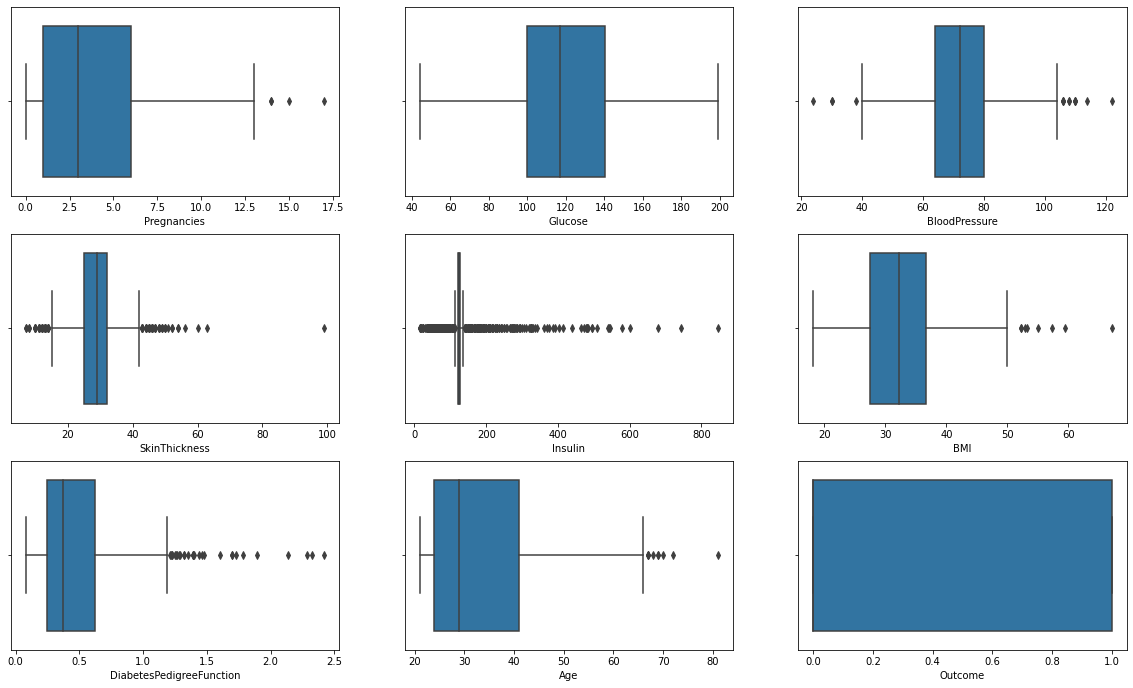

In [138]:
#Checking for outliers

plt.figure(figsize=(20,16))
for i in range(len(df.columns)):
    plt.subplot(4,3,i+1)
    sns.boxplot(df.iloc[:,i])

We notice lot of outliers in Insulin column. Lets treat them using Capping method.
Also the outlier values for other columns seems possible genuine values hence we will not alter them.

In [139]:
#Treating Outliers In "Insulin"
#we are changing the quantile value to 85% and 15% as there are lot of outliers with 75% and 25% and we dont want to lose lot of information capping them.

Q3 = df.Insulin.quantile(0.85)
Q1 = df.Insulin.quantile(0.15)
IQR = Q3-Q1
upper = Q3 + 1.5 * (IQR)
lower = Q3 - 1.5 * (IQR)
print(lower,upper)

39.12500000000006 320.67499999999967


In [140]:
#index of outliers
index_upper = df[df.Insulin > upper].index
index_lower = df[df.Insulin < lower].index

#Capping to upper and lower values
df.loc[index_upper,'Insulin'] = upper
df.loc[index_lower,'Insulin'] = lower

In [141]:
df.to_excel("Diabetes.xlsx")  #Saving the cleaned dataset to be used further for creating a dashboard in Tableau

#### Q7. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?

When building our machine learning classification model for this Diabetes dataset, it is important to evaluate its performance using appropriate validation techniques. 

   Sampling: We shall split the dataset into training and testing sets, and use the training set to train the model and the testing set to evaluate its performance.

   Cross-validation technique: It is a technique used to estimate the performance of a model on new data by partitioning the available data into training and testing sets. In k-fold cross-validation, the data is divided into k subsets, and the model is trained on k-1 subsets and tested on the remaining subset. This process is repeated k times, with each subset used once as the testing data. The cross-validation score is then calculated as the average performance of the model across all k subsets.This technique helps to reduce overfitting and provides a more robust estimate of the model's performance.

   Grid search: This technique involves testing different combinations of hyperparameters (e.g., regularization strength, learning rate, number of layers) to find the optimal set of hyperparameters that results in the best performance.

Using one or more of these validation techniques can help ensure that our classification model is accurate and reliable

Also parameters like sensitivity, specificity, and AUC (ROC curve) can be very helpful in evaluating the performance of our classification model.

   Sensitivity and specificity are measures of the model's accuracy in predicting the positive and negative cases, respectively. Sensitivity is the proportion of true positive cases (i.e., correctly identified as diabetic) to all actual positive cases, while specificity is the proportion of true negative cases (i.e., correctly identified as non-diabetic) to all actual negative cases. A good classification model should have high sensitivity and specificity, indicating that it can accurately identify both diabetic and non-diabetic patients.

   AUC (Area Under the Curve) is a metric that measures the model's ability to distinguish between positive and negative cases. The ROC curve is a plot of sensitivity versus 1-specificity at various classification thresholds. AUC ranges between 0 and 1, with 1 indicating perfect classification and 0.5 indicating random classification. A higher AUC indicates a better model performance.

Therefore, by calculating sensitivity, specificity, and AUC, we can get a more comprehensive understanding of our model's performance and can make informed decisions on how to improve our model.


#### Q8. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.

#### Q9. Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?

In [142]:
#Splitting data into input and target variable
X = df.drop("Outcome", axis=1)
y = df.Outcome

In [143]:
#Scaling input data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [326]:
#Train Test Split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

#### Let us build our Model

### Model 1 : Logistic Regresssion

In [327]:
# fit model on training data
log_reg = LogisticRegression()
log_reg.fit(train_X, train_y)

LogisticRegression()

In [328]:
print('Train Score: {}'.format(log_reg.score(train_X, train_y)))  
print('Test Score: {}'.format(log_reg.score(test_X, test_y)))    

Train Score: 0.770949720670391
Test Score: 0.7835497835497836


In [329]:
pred_y =log_reg.predict(test_X)

In [330]:
#Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
print(cm)

[[136  35]
 [ 15  45]]


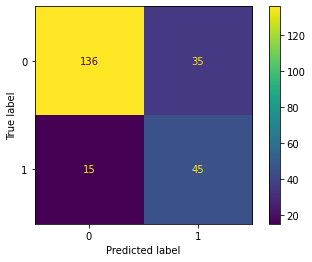

In [331]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()
plt.show()

In [332]:
#Classification Report
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

         0.0       0.90      0.80      0.84       171
         1.0       0.56      0.75      0.64        60

    accuracy                           0.78       231
   macro avg       0.73      0.77      0.74       231
weighted avg       0.81      0.78      0.79       231



In [333]:
#Extracting and saving scores
f1_lr = round((f1_score(pred_y, test_y, average='macro')),2)
precision_lr = round((precision_score(pred_y, test_y,average='macro')),2)
recall_lr = round((recall_score(pred_y, test_y,average='macro')),2)

In [334]:
#Accuracy Score
accuracy_lr = round((accuracy_score(test_y,pred_y)*100),2)
print("Test Accuracy of Logistic Regression : ", accuracy_lr)

Test Accuracy of Logistic Regression :  78.35


In [335]:
#Cross Validation Score
Cross_val_lr = round((cross_val_score(log_reg, test_X,test_y, cv=5).mean())*100,2)     
print("Cross-Validation Accuracy Scores: ",Cross_val_lr)

Cross-Validation Accuracy Scores:  78.77


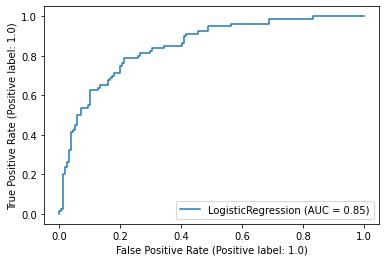

In [336]:
#ROC and AUC
plot_roc_curve(log_reg, test_X, test_y)
plt.show()

In [337]:
#Auroc score
auc_lr = round((roc_auc_score(test_y, log_reg.predict_proba(test_X)[:, 1])),2)
auc_lr

0.85

### Model 2 : Know Nearest Neighbour (KNN)

In [338]:
# fit model on training data
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)

KNeighborsClassifier()

In [339]:
print('Train Score: {}'.format(knn.score(train_X, train_y)))
print('Test Score: {}'.format(knn.score(test_X, test_y)))

Train Score: 0.819366852886406
Test Score: 0.7662337662337663


In [340]:
#Elbow Method
acc = list()
for n in range(2, int(np.sqrt(train_X.shape[0]))):
    knn = KNeighborsClassifier(n_neighbors=n)
    acc.append(cross_val_score(knn, X_scaled, y, cv = 5).mean())

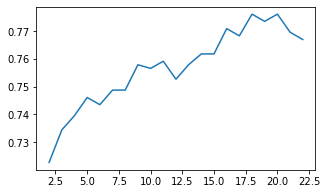

In [341]:
plt.figure(figsize=(5,3))
plt.plot(range(2, int(np.sqrt(train_X.shape[0]))), acc)
plt.show()

Cross validation scores reduces after 5, hence we fix k=5 here.

In [342]:
# fit model on training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)

KNeighborsClassifier()

In [343]:
pred_y_knn = knn.predict(test_X) 

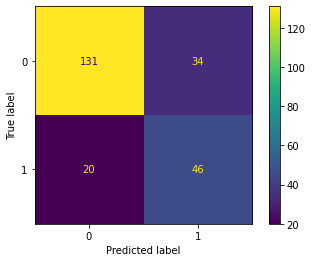

In [344]:
#Confusion Matrix
cm_k = confusion_matrix(pred_y_knn, test_y)
ConfusionMatrixDisplay(cm_k).plot()
plt.show()

In [345]:
#Classification Report
print(classification_report(pred_y_knn, test_y))

              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83       165
         1.0       0.57      0.70      0.63        66

    accuracy                           0.77       231
   macro avg       0.72      0.75      0.73       231
weighted avg       0.78      0.77      0.77       231



In [346]:
#Extracting and saving scores
f1_knn = round((f1_score(pred_y_knn, test_y, average='macro')),2)
precision_knn = round((precision_score(pred_y_knn, test_y,average='macro')),2)
recall_knn = round((recall_score(pred_y_knn, test_y,average='macro')),2)

In [347]:
#Accuracy Score
accuracy_knn = round((accuracy_score(test_y,pred_y_knn)*100),2)
print("Test Accuracy of KNN Classifier : ",accuracy_knn)

Test Accuracy of KNN Classifier :  76.62


In [348]:
#Cross Validation Score
Cross_val_knn = round((cross_val_score(knn, test_X,test_y, cv=5).mean())*100,2)     
print("Cross-Validation Accuracy Scores knn : ",Cross_val_knn)

Cross-Validation Accuracy Scores knn :  72.71


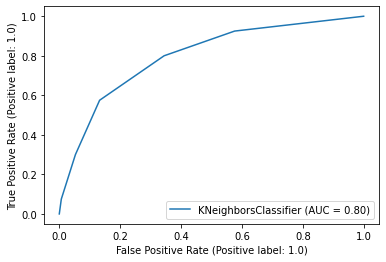

In [349]:
#ROC and AUC
plot_roc_curve(knn, test_X, test_y)
plt.show()

In [350]:
auc_knn = round((roc_auc_score(test_y, knn.predict_proba(test_X)[:, 1])),2)
auc_knn

0.8

### Model 3 : Decision Tree Classifier

In [351]:
# fit model on training data
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [352]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))  
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))   

Train Score: 1.0
Test Score: 0.7575757575757576


In [353]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

0.6890100380754586

In [354]:
#Our model looks overfitted as per the test and train scores above
#Applying Grid search cv to find best estimaters to improve model performance

param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_leaf': [3, 5, 7, 9]
}

gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [3, 5, 7, 9]},
             verbose=1)

In [355]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=7)

In [356]:
cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean() 
#we can see model has improved. we will use this best estimators to built our model.

0.7244029075804777

In [357]:
clf = gscv.best_estimator_
pred_y_dt = clf.predict(test_X)

In [358]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.8472998137802608
Test Score: 0.7878787878787878


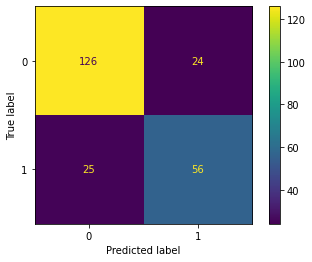

In [359]:
#Confusion Matrix
cm_dt = confusion_matrix(pred_y_dt, test_y)
ConfusionMatrixDisplay(cm_dt).plot()
plt.show()

In [360]:
#Classification Report
print(classification_report(pred_y_dt, test_y))

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       150
         1.0       0.70      0.69      0.70        81

    accuracy                           0.79       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231



In [361]:
#Extracting and saving scores
f1_dt = round((f1_score(pred_y_dt, test_y, average='macro')),2)
precision_dt = round((precision_score(pred_y_dt, test_y,average='macro')),2)
recall_dt = round((recall_score(pred_y_dt, test_y,average='macro')),2)

In [362]:
#Accuracy Score
accuracy_dt = round(accuracy_score(test_y,pred_y_dt)*100, 2)
print("Test Accuracy of Decision Tree Classifier : ",accuracy_dt)

Test Accuracy of Decision Tree Classifier :  78.79


In [363]:
#Cross Validation Score
Cross_val_dt = round((cross_val_score(clf, test_X,test_y, cv=5).mean())*100,2)   
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val_dt)

Cross-Validation Accuracy Scores Decision Tree :  71.0


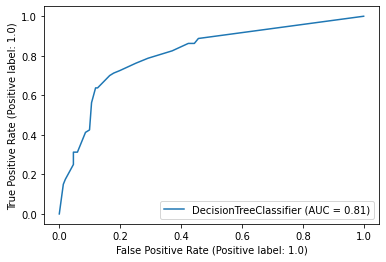

In [364]:
#ROC and AUC
plot_roc_curve(clf, test_X, test_y)
plt.show()

In [365]:
auc_dt = round((roc_auc_score(test_y, clf.predict_proba(test_X)[:, 1])),2)
auc_dt

0.81

### Model 4 : Random Forest Classifier

In [366]:
# fit model on training data
rfc = RandomForestClassifier()
rfc.fit(train_X,train_y)

RandomForestClassifier()

In [367]:
print('Train Score: {}'.format(rfc.score(train_X, train_y)))  
print('Test Score: {}'.format(rfc.score(test_X, test_y)))    

Train Score: 0.9981378026070763
Test Score: 0.7878787878787878


In [368]:
cross_val_score(rfc, train_X,train_y, cv=5).mean()

0.7355486327448943

In [369]:
#Our model looks overfitted as per the test and train scores above
#Applying grid search CV
param_grid = {
    'n_estimators': [20, 50, 100, 150,200],
    'max_depth': [3, 5, 7, None],
    'min_samples_leaf': [3, 5, 7, 9]
}

gscv_rf = GridSearchCV(rfc, param_grid, cv=5, verbose=1)
gscv_rf.fit(train_X,train_y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [3, 5, 7, 9],
                         'n_estimators': [20, 50, 100, 150, 200]},
             verbose=1)

In [370]:
gscv_rf.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=9, n_estimators=20)

In [371]:
random_forest = gscv.best_estimator_
pred_y_rf = random_forest.predict(test_X)

In [372]:
print('Train Score: {}'.format(random_forest.score(train_X, train_y)))
print('Test Score: {}'.format(random_forest.score(test_X, test_y)))

Train Score: 0.8472998137802608
Test Score: 0.7878787878787878


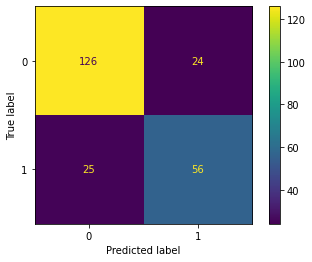

In [373]:
#Confusion Matrix
cm_rf = confusion_matrix(pred_y_rf, test_y)
ConfusionMatrixDisplay(cm_rf).plot()
plt.show()

In [374]:
#Classification Report
print(classification_report(pred_y_rf, test_y))

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       150
         1.0       0.70      0.69      0.70        81

    accuracy                           0.79       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231



In [375]:
#Extracting and saving scores
f1_rf = round((f1_score(pred_y_rf, test_y, average='macro')),2)
precision_rf = round((precision_score(pred_y_rf, test_y,average='macro')),2)
recall_rf = round((recall_score(pred_y_rf, test_y,average='macro')),2)

In [376]:
#Accuracy Score
accuracy_rf = round(accuracy_score(test_y,pred_y_rf)*100,2)
print("Test Accuracy of Random Forest Classifier : ",accuracy_rf)

Test Accuracy of Random Forest Classifier :  78.79


In [377]:
#Cross Validation Score
Cross_val_rf = round((cross_val_score(random_forest, test_X,test_y, cv=5).mean())*100,2)     
print("Cross-Validation Accuracy Scores Random Forest Classifier : ",Cross_val_rf)

Cross-Validation Accuracy Scores Random Forest Classifier :  70.55


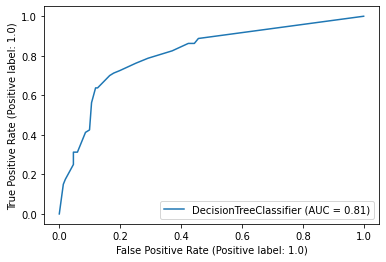

In [378]:
#ROC and AUC
plot_roc_curve(random_forest, test_X, test_y)
plt.show()

In [379]:
auc_rf = round((roc_auc_score(test_y,random_forest.predict_proba(test_X)[:, 1])),2)
auc_rf

0.81

### Model 5 : Support Vector Machines

In [380]:
# fit model on training data
svc= SVC()
svc.fit(train_X, train_y)

SVC()

In [381]:
print('Train Score: {}'.format(svc.score(train_X, train_y)))  
print('Test Score: {}'.format(svc.score(test_X, test_y)))    

Train Score: 0.8268156424581006
Test Score: 0.7922077922077922


In [382]:
cross_val_score(svc, train_X,train_y, cv=5).mean()

0.7504499826929732

In [383]:
# Tuning Hyperparameters of SVM using GridSearch
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

In [384]:
gscv = GridSearchCV(svc, param_grid, cv=5, verbose=1)
gscv.fit(train_X,train_y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             verbose=1)

In [385]:
gscv.best_params_

{'C': 1, 'gamma': 0.01}

In [386]:
gscv.best_estimator_

SVC(C=1, gamma=0.01)

In [387]:
svm = gscv.best_estimator_
pred_y_svm = svm.predict(test_X)

In [388]:
print('Train Score: {}'.format(svm.score(train_X, train_y)))
print('Test Score: {}'.format(svm.score(test_X, test_y)))

Train Score: 0.7728119180633147
Test Score: 0.7965367965367965


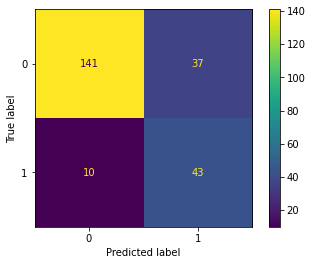

In [389]:
#Confusion Matrix
cm_svm = confusion_matrix(pred_y_svm, test_y)
ConfusionMatrixDisplay(cm_svm).plot()
plt.show()

In [390]:
#Classification Report
print(classification_report(pred_y_svm, test_y))

              precision    recall  f1-score   support

         0.0       0.93      0.79      0.86       178
         1.0       0.54      0.81      0.65        53

    accuracy                           0.80       231
   macro avg       0.74      0.80      0.75       231
weighted avg       0.84      0.80      0.81       231



In [391]:
#Extracting and saving scores
f1_svm = round((f1_score(pred_y_svm, test_y, average='macro')),2)
precision_svm = round((precision_score(pred_y_svm, test_y,average='macro')),2)
recall_svm = round((recall_score(pred_y_svm, test_y,average='macro')),2)

In [392]:
#Accuracy Score
accuracy_svm = round((accuracy_score(test_y,pred_y_svm)*100),2)
print("Accuracy Score of Support Vector Machine : ", accuracy_svm)

Accuracy Score of Support Vector Machine :  79.65


In [393]:
#Cross Validation Score
Cross_val_svm = round((cross_val_score(svm, test_X,test_y, cv=5).mean()*100),2)     
print("Cross-Validation Accuracy Scores Support Vector Machine : ",Cross_val_svm)

Cross-Validation Accuracy Scores Support Vector Machine :  80.53


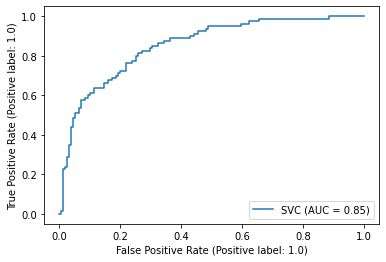

In [394]:
#ROC and AUC
plot_roc_curve(svm, test_X, test_y)
plt.show()

### Model 6 : XGBoost

In [395]:
# fit model on training data
xgb = XGBClassifier()
xgb.fit(train_X,train_y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [396]:
print('Train Score: {}'.format(xgb.score(train_X, train_y)))  
print('Test Score: {}'.format(xgb.score(test_X, test_y)))   

Train Score: 1.0
Test Score: 0.7575757575757576


In [397]:
pred_y_xgb = xgb.predict(test_X)

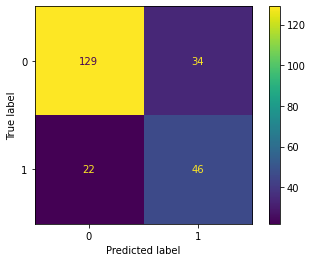

In [398]:
#Confusion Matrix
cm = confusion_matrix(pred_y_xgb, test_y)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [399]:
#Classification Report
print(classification_report(pred_y_xgb, test_y))

              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82       163
         1.0       0.57      0.68      0.62        68

    accuracy                           0.76       231
   macro avg       0.71      0.73      0.72       231
weighted avg       0.77      0.76      0.76       231



In [400]:
#Extracting and saving scores
f1_xgb = round((f1_score(pred_y_xgb, test_y, average='macro')),2)
precision_xgb = round((precision_score(pred_y_xgb, test_y,average='macro')),2)
recall_xgb = round((recall_score(pred_y_xgb, test_y,average='macro')),2)

In [401]:
#Accuracy Score
accuracy_xgb = round(accuracy_score(test_y,pred_y_xgb)*100,2)
print("Test Accuracy of XGBoost : ",accuracy_xgb)

Test Accuracy of XGBoost :  75.76


In [402]:
#Cross Validation Score
Cross_val_xgb = round(cross_val_score(xgb, test_X,test_y, cv=5).mean()*100,2)     
print("Cross-Validation Accuracy Scores XGBoost : ",Cross_val_xgb)

Cross-Validation Accuracy Scores XGBoost :  76.6


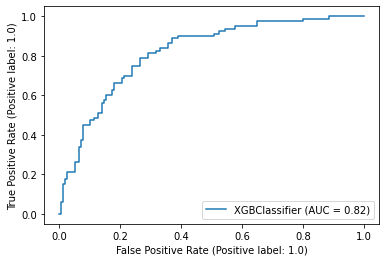

In [403]:
#ROC and AUC
plot_roc_curve(xgb, test_X, test_y)
plt.show()

In [404]:
auc_xgb = round((roc_auc_score(test_y, xgb.predict_proba(test_X)[:, 1])),2)
auc_xgb

0.82

### Model 7 :Gaussian Naive Bayes

In [405]:
# fit model on training data
gnb = GaussianNB()
gnb.fit(train_X, train_y)

GaussianNB()

In [406]:
print('Train Score: {}'.format(gnb.score(train_X, train_y)))  
print('Test Score: {}'.format(gnb.score(test_X, test_y)))   

Train Score: 0.7411545623836127
Test Score: 0.7705627705627706


In [407]:
pred_y_gnb = gnb.predict(test_X)

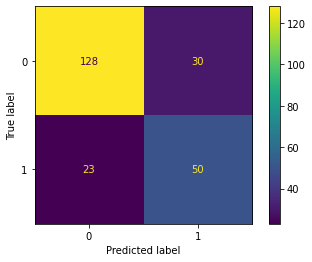

In [408]:
#Confusion Matrix
cm = confusion_matrix(pred_y_gnb, test_y)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [409]:
#Classification Report
print(classification_report(pred_y_gnb, test_y))

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       158
         1.0       0.62      0.68      0.65        73

    accuracy                           0.77       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.78      0.77      0.77       231



In [410]:
#Extracting and saving scores
f1_gnb = round((f1_score(pred_y_gnb, test_y, average='macro')),2)
precision_gnb = round((precision_score(pred_y_gnb, test_y,average='macro')),2)
recall_gnb = round((recall_score(pred_y_gnb, test_y,average='macro')),2)

In [411]:
#Accuracy Score
accuracy_gnb = round(accuracy_score(test_y,pred_y_gnb)*100,2)
print("Test Accuracy of Gaussian Naive Bayes : ", accuracy_gnb)

Test Accuracy of Gaussian Naive Bayes :  77.06


In [412]:
#Cross Validation Score
Cross_val_gnb = round((cross_val_score(gnb, test_X,test_y, cv=5).mean()*100),2)     
print("Cross-Validation Accuracy Scores Gaussian Naive Bayes : ",Cross_val_gnb)

Cross-Validation Accuracy Scores Gaussian Naive Bayes :  77.05


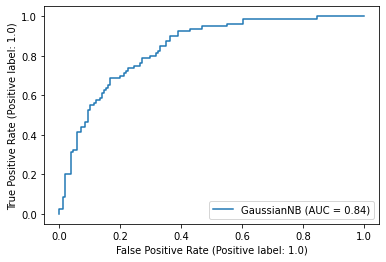

In [413]:
#ROC and AUC
plot_roc_curve(gnb, test_X, test_y)
plt.show()

In [414]:
auc_gnb = round((roc_auc_score(test_y, gnb.predict_proba(test_X)[:, 1])),2)
auc_gnb

0.84

### Model Comparison

In [415]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 
              'Random Forest', 'Support Vector Machines', 'XGBoost','Gaussian Naive Bayes'],
    'Cross Validation Score': [Cross_val_lr,Cross_val_knn,Cross_val_dt,Cross_val_rf,Cross_val_svm,Cross_val_xgb,Cross_val_gnb],
    'Accuracy Score': [accuracy_lr,accuracy_knn,accuracy_dt,accuracy_rf,accuracy_svm,accuracy_xgb,accuracy_gnb],
    'f1_Score' : [f1_lr,f1_knn,f1_dt,f1_rf,f1_svm,f1_xgb,f1_gnb],
    'Precision' : [precision_lr,precision_knn,precision_dt,precision_rf,precision_svm,precision_xgb,precision_gnb],
    'Recall':[recall_lr,recall_knn,recall_dt,recall_rf,recall_svm,recall_xgb,recall_gnb],
    'AUROC Score' : [auc_lr,auc_knn,auc_dt,auc_rf,np.nan,auc_xgb,auc_gnb]
})

models.sort_values(by='Cross Validation Score', ascending = False)


,Model,Cross Validation Score,Accuracy Score,f1_Score,Precision,Recall,AUROC Score
4,Support Vector Machines,80.53,79.65,0.75,0.74,0.80,NaN
0,Logistic Regression,78.77,78.35,0.74,0.73,0.77,0.85
6,Gaussian Naive Bayes,77.05,77.06,0.74,0.74,0.75,0.84
5,XGBoost,76.60,75.76,0.72,0.71,0.73,0.82
1,KNN,72.71,76.62,0.73,0.72,0.75,0.80
2,Decision Tree,71.00,78.79,0.77,0.77,0.77,0.81
3,Random Forest,70.55,78.79,0.77,0.77,0.77,0.81


### Final Conclusion

Based on our analysis, it appears that the "Support Vector Machines (SVM)" model is most effective at predicting whether a patient is diabetic or not for this diabetes dataset. 

Our conclusion is supported by the Cross-validation score, Accuracy score and other metrics which is highest for SVM.
Accuracy score measures the performance of a model on a single dataset, whereas Cross-validation score estimates the generalizability of the model by evaluating its performance on multiple subsets of the data. In other words, accuracy score tells us how well the model fits the data it was trained on, while cross-validation score gives us an idea of how well the model will perform on new, unseen data.
We thus select the "Support Vector Machines Model" as the right model due to high Cross Validation Score and Accuracy Score and also good Precision and Recall Scores.

While other models such as Logistic Regression, KNN, Naive Bayes, Decision tree, Random forest and XGBoost were also implemented, out of which "Logistic Regression" Model has also performed fairly well, while others did not perform as good as SVM and Logistic Regression. 

### Final Classifier Model

In [417]:
final_model = SVC(C=1, gamma=0.01)
final_model.fit(train_X, train_y)

SVC(C=1, gamma=0.01)

In [419]:
final_model.score(test_X, test_y) *100

79.65367965367966

### Pickling Final Classifier

In [421]:
import pickle
pickle.dump(final_model, open("SVM_Diabetes_clf.pkl", 'wb'))

#our model is now saved for future prediction

#### Let us now load our saved model and inspect. Let us also make some predictions

In [427]:
saved_svm = pickle.load(open("SVM_Diabetes_clf.pkl", 'rb'))

In [428]:
saved_svm.score(test_X, test_y) *100

79.65367965367966

In [431]:
cross_val_score(saved_svm, test_X,test_y, cv=5).mean()*100  

80.527289546716

In [430]:
print(classification_report(saved_svm.predict(test_X), test_y))  

              precision    recall  f1-score   support

         0.0       0.93      0.79      0.86       178
         1.0       0.54      0.81      0.65        53

    accuracy                           0.80       231
   macro avg       0.74      0.80      0.75       231
weighted avg       0.84      0.80      0.81       231



Upon inspection we can conclude that our saved model is providing the same results as it was trained without any discrepancies.

#### Predicting the new samples

In [445]:
samples = test_X.iloc[:5]  #selecting 5 observations for predicting

In [446]:
pred = saved_svm.predict(samples)
pred

array([0., 0., 0., 1., 0.])

In [443]:
actual = test_y.iloc[:5]
actual.values

array([0., 0., 0., 1., 0.])

We notice here, our model has correctly predicted all the samples.

#### Q10. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

    a) Pie chart to describe the diabetic/non-diabetic population.
    b) Scatter charts between relevant variables to analyse the relationship.
    c) Histogram/frequency charts to analyse the distribution of the data.
    d) Heatmap of correlation analysis among the relevant variables.
    e) Create bins of Age values 20-25, 25-30, 30-35 etc. and analyse different variables for these age brackets using a bubble chart.

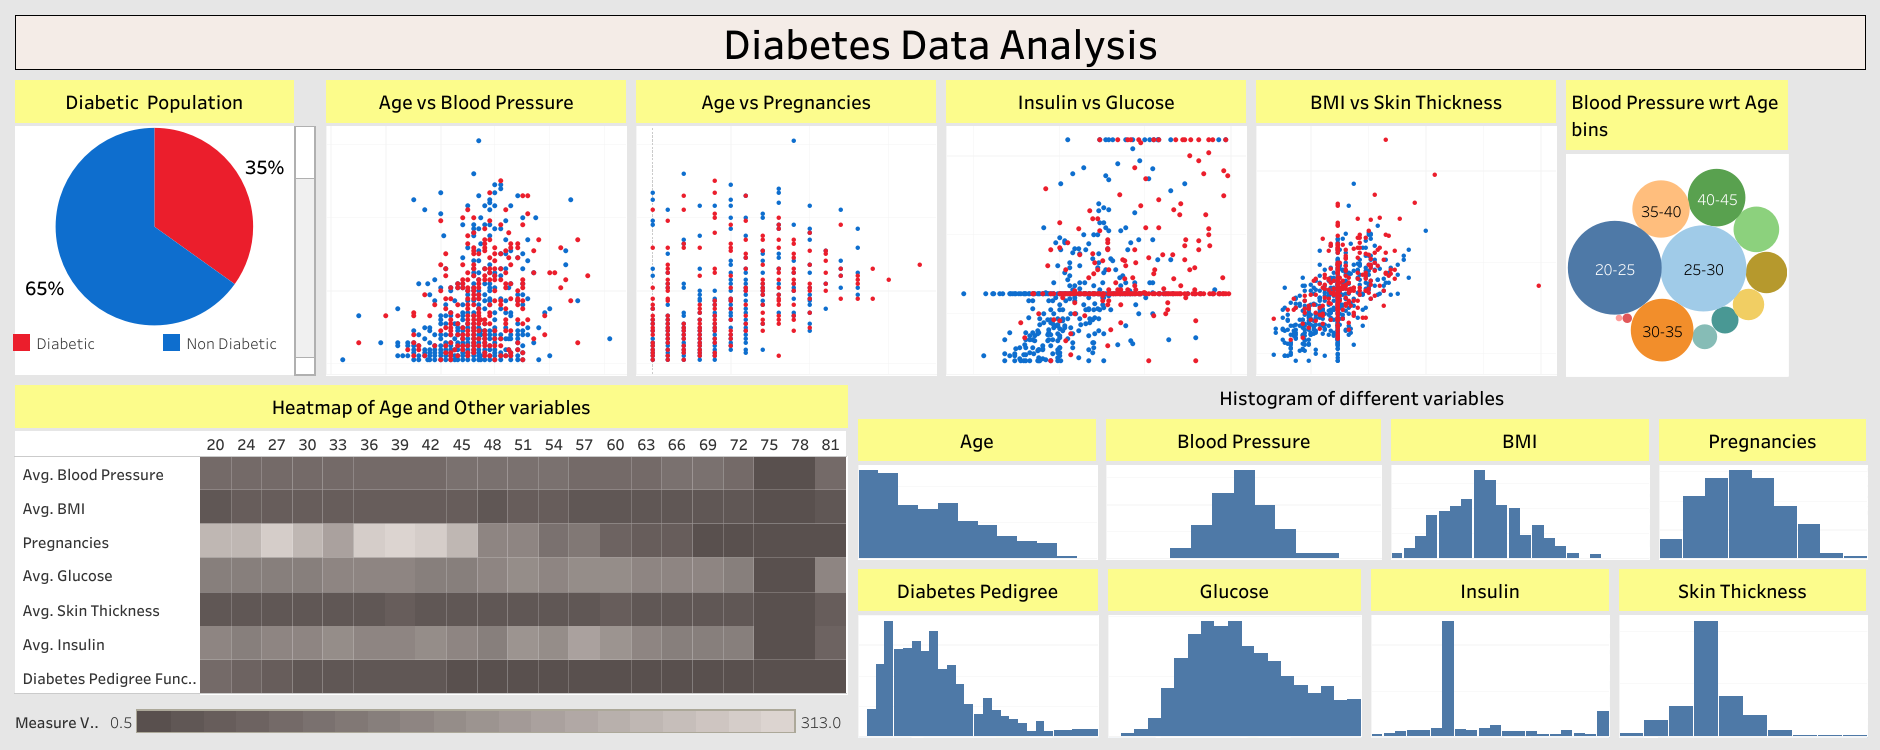

In [416]:
#Display image of my Tableau Dashboard
from IPython.display import Image
Image(filename = "Dashboard Diabetes.png",width=1000, height=5000)

Tableau Public Link of the above Dashboard:

https://public.tableau.com/app/profile/archana.kokate/viz/DiabetesDataAnalysis_16775195123650/Dashboard1



Project prepared by:

Archana Kokate